In [1]:
# Aim: To group customers into categories based on patterns inorder to know those to target more

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mall = pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

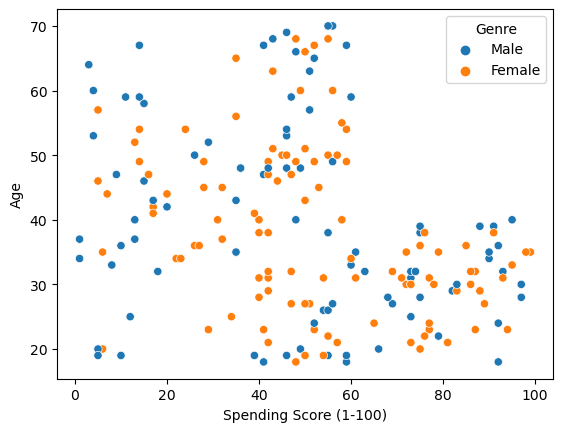

In [4]:
sns.scatterplot(data = mall, x = "Spending Score (1-100)", y = "Age", hue = "Genre")

In [5]:
mall.describe() #There seem to be no outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall.isna().sum() #No missing value

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
mall[mall["Genre"] == "Male"].count()

CustomerID                88
Genre                     88
Age                       88
Annual Income (k$)        88
Spending Score (1-100)    88
dtype: int64

In [8]:
mall[mall["Genre"] == "Female"].count() #This shows there is no balance in the gender

CustomerID                112
Genre                     112
Age                       112
Annual Income (k$)        112
Spending Score (1-100)    112
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_15284\3352072345.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mall.corr())
C:\Users\HP\AppData\Local\Temp\ipykernel_15284\3352072345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mall.corr() #CustomerID can be removed. It correlates alot with Annual Income and is not necessary


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


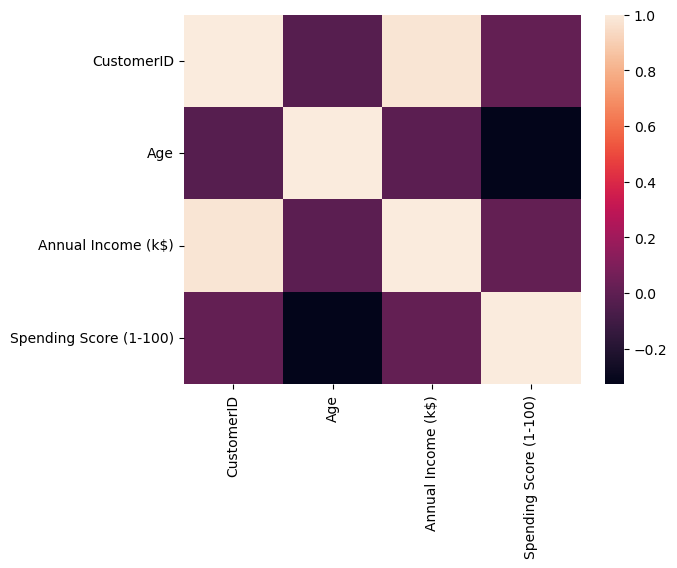

In [9]:
# Let's use heatmap
sns.heatmap(mall.corr())
mall.corr() #CustomerID can be removed. It correlates alot with Annual Income and is not necessary

In [10]:
mall_con = pd.get_dummies(mall)
mall_con

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [11]:
mall_con = mall_con.drop(["CustomerID"], axis = 1)
mall_con # Remove the CustomerID since it is not really relevant.

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [12]:
#### There is no need to balance in unsupervised learning

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
mall_sc = sc.fit_transform(mall_con)
mall_sc

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [14]:
# To reduce the number of columns using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
mall_transform = pca.fit_transform(mall_sc)
mall_transform


array([[ 1.32190829e+00, -7.82593850e-01],
       [ 1.15001870e+00, -1.81681292e+00],
       [-1.32003278e+00,  6.07360185e-01],
       [-1.61384934e+00, -1.15995935e+00],
       [-1.37654369e+00,  2.34456765e-01],
       [-1.61503894e+00, -1.18630229e+00],
       [-1.18676491e+00,  1.34840967e+00],
       [-1.68466941e+00, -1.62589038e+00],
       [ 1.87798964e+00,  2.41946410e+00],
       [-1.52333871e+00, -6.86323906e-01],
       [ 1.85403933e+00,  2.27207653e+00],
       [-1.60223657e+00, -1.16596003e+00],
       [-1.02590985e+00,  2.24540259e+00],
       [-1.59405689e+00, -1.12399330e+00],
       [ 1.60610643e+00,  7.99600664e-01],
       [ 1.18162771e+00, -1.73032429e+00],
       [-1.30873721e+00,  5.55017103e-01],
       [ 1.22590297e+00, -1.48254749e+00],
       [ 1.67023099e+00,  1.10519314e+00],
       [-1.58645474e+00, -1.15286177e+00],
       [ 1.50142275e+00,  9.19916993e-02],
       [ 1.24542357e+00, -1.43263174e+00],
       [-1.06892774e+00,  1.89961566e+00],
       [ 1.

In [15]:
## USING KMEANS

In [16]:
#To find the values of k using Elbow Method

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters= i, init = "k-means++", random_state = 42)
    model.fit(mall_transform)
    wcss.append(model.inertia_)
wcss

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

[667.1032814713999,
 265.8079316786695,
 157.02249572266015,
 55.89245817125659,
 41.14650530870381,
 28.697186220738097,
 22.266452124182184,
 17.919934874830282,
 14.20549376213916,
 11.826905585119203]

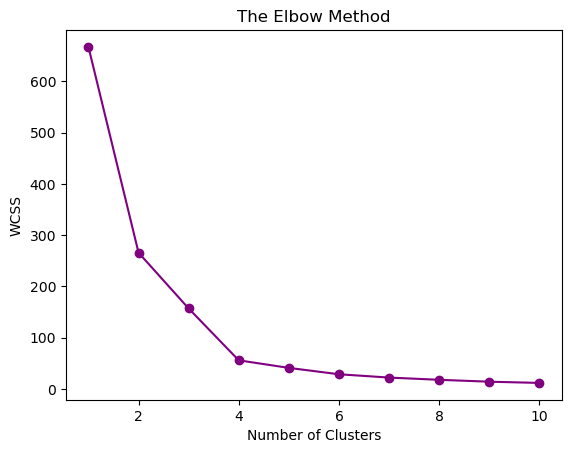

In [17]:
plt.plot(range(1,11), wcss, color='purple', marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show() # So there are not many clusters, 5 is appropraite

In [18]:
# TRAINING AND PREDICTING THE KMEANS MODEL ON A DATASET
model = KMeans(n_clusters=4, init = "k-means++", random_state=42)
y_means = model.fit_predict(mall_transform)
y_means

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 2, 1, 2, 0, 3, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 3, 1, 2, 0, 3,
       1, 3, 1, 3, 3, 3, 1, 2, 3, 0, 1, 0, 1, 0, 3, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 3, 0, 1, 1, 1, 0, 2, 1, 0, 3, 1, 0, 2, 0, 1, 3, 0, 1, 3,
       3, 1, 1, 2, 0, 1, 3, 2, 1, 3, 0, 2, 3, 1, 0, 2, 0, 3, 1, 0, 0, 0,
       0, 3, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 3, 2, 3, 3, 0, 2, 0, 2, 0, 2,
       3, 3, 0, 3, 1, 2, 0, 3, 1, 2, 3, 3, 0, 2, 0, 3, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 3, 1, 3, 0, 3, 1, 3, 1, 2,
       0, 2])

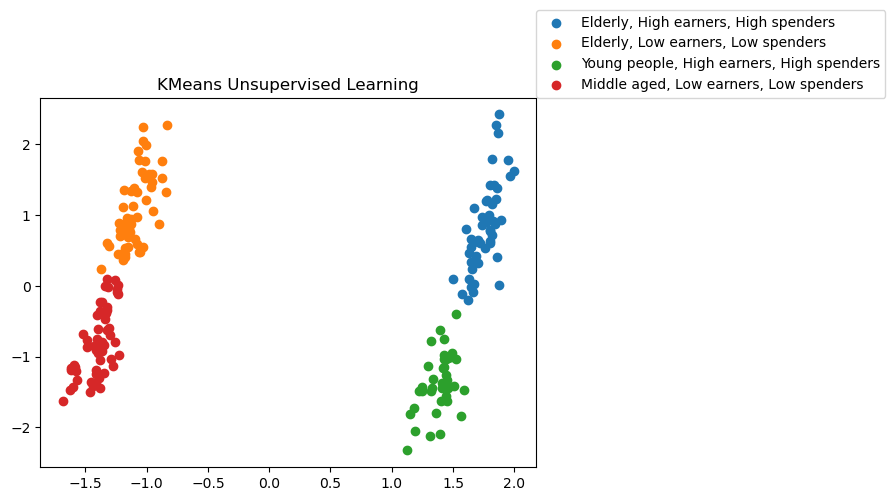

In [19]:
# Visualizing the Cluster

plt.scatter(mall_transform[y_means == 0,0], mall_transform[y_means == 0,1], label = "Elderly, High earners, High spenders", )
plt.scatter(mall_transform[y_means == 1,0], mall_transform[y_means == 1,1], label = "Elderly, Low earners, Low spenders")
plt.scatter(mall_transform[y_means == 2,0], mall_transform[y_means == 2,1], label = "Young people, High earners, High spenders")
plt.scatter(mall_transform[y_means == 3,0], mall_transform[y_means == 3,1], label = "Middle aged, Low earners, Low spenders")
plt.title("KMeans Unsupervised Learning")
plt.legend(loc = [1.0, 1.0])
plt.show()

In [20]:
components_df = pd.DataFrame(pca.components_, columns=mall_con.columns)
print("Principal Components:")
print(components_df)

Principal Components:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0  0.118556            0.073908               -0.115858     -0.695363   
1  0.694844           -0.091045               -0.695461      0.112332   

   Genre_Male  
0    0.695363  
1   -0.112332  


In [21]:
# Cluster 1:
# PC1 Contribution: Moderate positive contribution from Age, moderate negative contribution from Annual Income, moderate negative contribution from Spending Score.
# Genre Contribution: Balanced representation of both genders.
# Interpretation: This cluster might represent individuals with a moderate age, lower annual income, and lower spending scores. The balance in gender representation suggests a mix of both male and female individuals.
# Cluster 2:
# PC1 Contribution: High positive contribution from Age, low negative contribution from Annual Income, low negative contribution from Spending Score.
# Genre Contribution: Skewed towards one gender (either Male or Female).
# Interpretation: This cluster could represent individuals with a higher age, lower annual income, and lower spending scores. The skewness in gender representation might indicate a predominant gender in this group.
# Cluster 3:
# PC1 Contribution: Low positive contribution from Age, high negative contribution from Annual Income, high negative contribution from Spending Score.
# Genre Contribution: Skewed towards the opposite gender of Cluster 2.
# Interpretation: This cluster may represent individuals with a lower age, higher annual income, and higher spending scores compared to Cluster 2. The opposite skewness in gender representation suggests a contrast to Cluster 2.
# Cluster 4:
# PC1 Contribution: Moderate positive contribution from Age, moderate positive contribution from Annual Income, moderate positive contribution from Spending Score.
# Genre Contribution: Balanced representation of both genders.
# Interpretation: This cluster might represent individuals with a balanced profile across age, annual income, and spending scores. The balance in gender representation suggests a mix of both male and female individuals.

In [22]:
new_data = [[32, 126, 74, 0, 1]]

# Apply the same preprocessing steps as during training
scaled_data = sc.transform(new_data)
transformed_data = pca.transform(scaled_data)

# Make predictions using the KMeans model
cluster_labels = model.predict(transformed_data)

print("Predicted cluster labels:", cluster_labels)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted cluster labels: [2]


### USING HIERARCHICAL CLUSTERING

In [23]:
# HIERARCHICAL CLUSTERING might not be the best because it cannot accept just one data point. It requires multiple data points

In [24]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
y_predict = model2.fit_predict(mall_transform)
y_predict

array([2, 2, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 2, 0, 2, 1, 3, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 1, 1, 0, 3, 1, 0, 3,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 3, 0, 2, 0, 3, 1, 2, 1, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 0, 3,
       1, 2, 1, 2, 0, 3, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 1, 3, 0, 3, 0, 2,
       1, 2], dtype=int64)

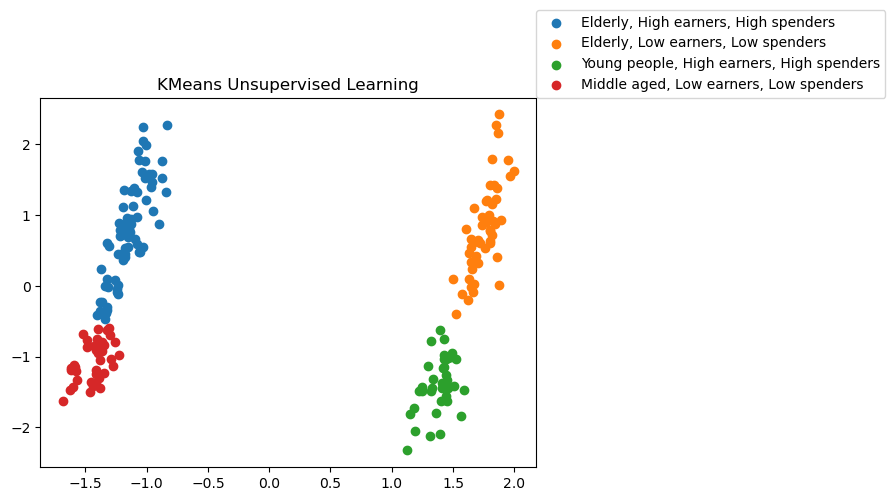

In [25]:
# Visualizing the Cluster

plt.scatter(mall_transform[y_predict == 0,0], mall_transform[y_predict == 0,1], label = "Elderly, High earners, High spenders", )
plt.scatter(mall_transform[y_predict == 1,0], mall_transform[y_predict == 1,1], label = "Elderly, Low earners, Low spenders")
plt.scatter(mall_transform[y_predict == 2,0], mall_transform[y_predict == 2,1], label = "Young people, High earners, High spenders")
plt.scatter(mall_transform[y_predict == 3,0], mall_transform[y_predict == 3,1], label = "Middle aged, Low earners, Low spenders")
plt.title("KMeans Unsupervised Learning")
plt.legend(loc = [1.0, 1.0])
plt.show()

In [26]:
# Testing model
new_data2 = np.array([[19, 17, 74, 1, 0],
                      [78, 200, 300, 1, 0],
                      [25, 5, 80, 1, 1]])

# Apply the same preprocessing steps as during training
scaled_data = sc.transform(new_data2)
transformed_data = pca.transform(scaled_data)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
# Make predictions using the Hierarchical clustering model
# It does not have a property predict
from scipy.cluster.hierarchy import fcluster, linkage
linkage_matrix = linkage(new_data2, method='average', metric='euclidean')

# Replace 'distance_threshold' with the threshold used during training
distance_threshold = 10  # Replace with the actual threshold
#It's good to use the cluseter you want
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

print("Predicted cluster labels for Hierarchical:", cluster_labels)

Predicted cluster labels for Hierarchical: [1 3 2]


In [28]:
mall_sc.shape

(200, 5)

In [29]:
scaled_data.shape

(3, 5)